<a href="https://colab.research.google.com/github/magalvezc/100-pandas-puzzles/blob/master/Dia2Afternoon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de series de tiempo
### Introducción
Hasta ahora hemos estudiado datos que son estáticos en el tiempo. Esto fue importante ya que muchos modelos requieren que supongamos que las observaciones son independientes entre sí. Sin embargo, cuando se trata con datos ordenados por tiempo, muchas veces esta suposición ya no es válida. Por ejemplo, la temperatura observada hoy no es independiente de la temperatura de ayer. Otro ejemplo es el mercado de valores. Los precios de las acciones de hoy están relacionados con los precios de las acciones de ayer. En esta lección exploraremos cómo manejar los datos que contienen tales relaciones

### Descomposición de series de tiempo
Una de las formas de superar los problemas causados por tener una relación entre las observaciones es descomponer los datos en componentes. Por lo general, dividimos los datos en dos tipos de componentes: sistemáticos y no sistemáticos.

* Los componentes sistemáticos son componentes que pueden tener consistencia o recurrencia.
* Los componentes no sistemáticos no se pueden modelar.
Por lo general, podemos descomponer una serie temporal en 4 componentes: 3 componentes sistemáticos y un componente de ruido.:

* La media de la serie.
* La estacionalidad o patrón cíclico de la serie.
* La tendencia de la serie: este componente es lo que nos gustaría modelar
* El ruido es típicamente la variación aleatoria en nuestros datos.

### Descomposición de series de tiempo en Python
Nos centraremos en la biblioteca de modelos de estadísticas para modelar y trazar datos de series de tiempo en Python. statsmodels contiene una función llamada seasonal_decompose que nos permitirá trazar los datos descompuestos de las series temporales.

In [0]:
import pandas as pd

In [0]:
occupancy = pd.read_csv('https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/data/module-2/occupancy.csv')
occupancy.head()


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/2/2015 14:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2/2/2015 15:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2/2/2015 16:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2/2/2015 17:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2/2/2015 18:00,23.7540,26.200,488.600000,779.000000,0.004767,1


Para trazar estos datos, debemos asegurarnos de que nuestro índice sea una serie temporal con una frecuencia conocida. Para analizar datos de series de tiempo, los datos deben estar igualmente espaciados. En el siguiente código, cambiaremos el tipo de la columna de fecha a fecha y hora y cambiaremos el índice a la columna de fecha. Nuestra frecuencia es de 1 hora. Aunque podemos ver que la diferencia entre la observación es de 1 hora, no se infiere, y debemos especificarla nosotros mismos.

In [0]:
occupancy.date = pd.to_datetime(occupancy.date)
occupancy.index = pd.DatetimeIndex(occupancy.date, freq='H')
occupancy.index

DatetimeIndex(['2015-02-02 14:00:00', '2015-02-02 15:00:00',
               '2015-02-02 16:00:00', '2015-02-02 17:00:00',
               '2015-02-02 18:00:00', '2015-02-02 19:00:00',
               '2015-02-02 20:00:00', '2015-02-02 21:00:00',
               '2015-02-02 22:00:00', '2015-02-02 23:00:00',
               ...
               '2015-05-24 04:00:00', '2015-05-24 05:00:00',
               '2015-05-24 06:00:00', '2015-05-24 07:00:00',
               '2015-05-24 08:00:00', '2015-05-24 09:00:00',
               '2015-05-24 10:00:00', '2015-05-24 11:00:00',
               '2015-05-24 12:00:00', '2015-05-24 13:00:00'],
              dtype='datetime64[ns]', name='date', length=2664, freq='H')

Ahora podemos trazar la serie temporal descompuesta.

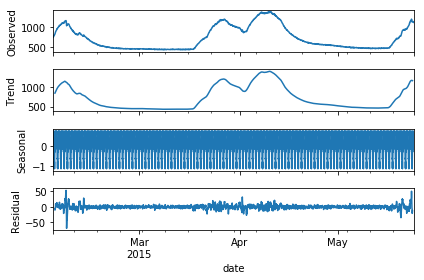

In [0]:
import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(occupancy.CO2)
resplot = res.plot()

### Autorregresión
Un modelo autorregresivo es un modelo que utiliza observaciones previas en la serie de tiempo para predecir el siguiente valor en el modelo. En lecciones anteriores, hemos analizado modelos lineales donde la variable de respuesta depende solo de las variables predictoras y la ecuación de regresión lineal

Sin embargo, cuando se trabaja con datos de series de tiempo, nuestra variable de respuesta depende no solo de las variables predictoras sino también de la variable de respuesta misma. Una variable que depende de sí misma se llama variable autocorrelacionada. Típicamente, nuestra ecuación de regresión será de la siguiente forma. La siguiente ecuación es un modelo autorregresivo que depende solo del período de tiempo anterior.

Nuestro modelo también puede depender de más de un período de tiempo en el pasado.

### Comprobación de autocorrelación
Podemos verificar la autocorrelación en nuestros datos utilizando un gráfico de retraso. Este gráfico representará y t contra y t-1. Pandas tiene una función llamada lag_plot para detectar estas relaciones.

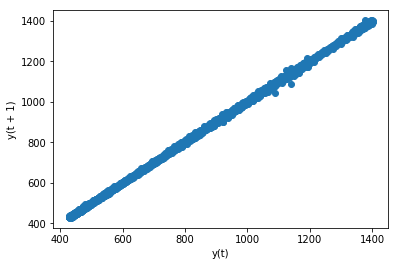

In [0]:
from pandas.plotting import lag_plot
lag_plot(occupancy.CO2)

Una línea a lo largo de la diagonal muestra que hay una relación autorregresiva.

Para crear un modelo autorregresivo usamos la función AR. Normalmente, observamos un modelo autorregresivo con la notación AR (n) donde n es el número de períodos de retraso. En el siguiente ejemplo, crearemos un modelo autorregresivo con retraso 1 para modelar la tasa de CO2. En el siguiente ejemplo, limitamos los períodos de retraso a 1. Sin embargo, si no establecemos un límite, el modelo puede contener más períodos de retraso.

Tenga en cuenta que dividimos los datos en prueba y entrenamiento y siempre usamos las últimas observaciones al trabajar con datos de series temporales. Hacemos esto para asegurarnos de que el modelo ofrezca buenas predicciones incluso sobre datos que no ha visto. Como los datos están ordenados, no podemos seleccionar los datos de la prueba al azar.

In [0]:
from statsmodels.tsa.ar_model import AR

train, test = occupancy.CO2[:-10], occupancy.CO2[-10:]
model = AR(occupancy.CO2)
model_fit = model.fit(maxlag=1)
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

Al igual que la regresión lineal, este modelo produce coeficientes para el modelo autorregresivo, así como predicciones.

In [0]:
print(model_fit.params)

const     0.001078
L1.CO2    1.000195
dtype: float64


In [0]:
pd.DataFrame({'observed':test, 'predicted':predictions})

,observed,predicted
date,,
2015-05-24 04:00:00,1153.250000,1152.725379
2015-05-24 05:00:00,1152.400000,1153.475525
2015-05-24 06:00:00,1146.166667,1152.625359
2015-05-24 07:00:00,1145.400000,1146.390813
2015-05-24 08:00:00,1140.800000,1145.623997
2015-05-24 09:00:00,1150.250000,1141.023102
2015-05-24 10:00:00,1129.200000,1150.474941
2015-05-24 11:00:00,1125.800000,1129.420844
2015-05-24 12:00:00,1123.000000,1126.020182


### Estacionariedad
Una serie temporal se considera estacionaria si su media y varianza no varían con el tiempo. Si bien no podemos considerar que una serie temporal estacionaria sea independiente, la estacionariedad es una estructura de dependencia que puede ayudarnos con una serie de técnicas de modelado. Para verificar si tenemos una serie de tiempo estacionaria, podemos examinar visualmente el gráfico de descomposición, calcular la media y la desviación estándar a lo largo del tiempo, o usar pruebas estadísticas. Una posible prueba es la prueba de Dickey-Fuller aumentada. Esta prueba tiene la siguiente hipótesis:

H 0: los datos no son estacionarios

H 1: los datos son estacionarios

Probamos la estacionariedad utilizando la función adrfuller en statsmodels. El siguiente ejemplo demuestra esto con nuestros datos de CO2. La función adrfuller devuelve múltiples valores. La segunda posición en la estructura de datos devuelta es el valor p de nuestra hipótesis.

In [0]:
from statsmodels.tsa.stattools import adfuller

adfuller(occupancy.CO2)[1]

0.0682262448324105

### Paseos al azar
Una caminata aleatoria es un tipo de modelo de serie temporal en el que cada observación depende de la suma de la observación anterior y un componente de ruido aleatorio. 

Las caminatas aleatorias se consideran no estacionarias porque la covarianza entre las observaciones depende del tiempo.

### Media móvil
Los modelos de promedio móvil son similares a los modelos autorregresivos. Los modelos de promedio móvil también dependen de una combinación lineal de datos pasados. Sin embargo, a diferencia de los modelos autorregresivos, estos modelos dependen de los términos del ruido blanco del pasado. Si bien el nombre es el mismo, los modelos de promedio móvil no son lo mismo que calcular el promedio móvil de una serie de tiempo.

Los modelos de promedio móvil generalmente se observan con MA (q) donde q es el número de términos de ruido blanco pasados sumados por el modelo. 

Tenga en cuenta que los errores se distribuyen normalmente con media 0 y varianza σ ω.

Podemos crear un modelo de promedio móvil usando la función ARMA en el paquete statsmodels. Esta función genera modelos que pueden tener tanto un componente autorregresivo como un componente de promedio móvil. Sin embargo, aquí estableceremos el retraso autorregresivo en cero para crear solo un modelo de promedio móvil. Usemos nuevamente nuestros datos de CO2 para este ejemplo.

In [0]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(occupancy.CO2, order=(0, 1))
model_fit = model.fit(disp=False)
predictions = model_fit.predict(len(occupancy.CO2)-3, len(occupancy.CO2)-1)

Veamos las predicciones:

In [0]:
pd.DataFrame({'observed':occupancy.CO2[-3:], 'predicted':predictions})

,observed,predicted
date,,
2015-05-24 11:00:00,1125.8,926.765185
2015-05-24 12:00:00,1123.0,915.381418
2015-05-24 13:00:00,1124.0,923.899751


Podemos ver que este modelo por sí solo no es un gran ajuste para estos datos, ya que existe una gran diferencia entre lo observado y lo previsto.

### Combinando autorregresión con media móvil
Como hemos visto en el párrafo anterior, podemos crear un modelo con un componente autorregresivo y un componente de media móvil. Este modelo se llama modelo ARMA y se denota por ARMA (n, q) donde n es el número de períodos de retraso y q es el número de términos de ruido blanco pasados. A continuación se muestra un ejemplo de un modelo ARMA con dos términos de retraso y un término de ruido blanco.

In [0]:
from statsmodels.tsa.arima_model import ARMA

# fit model
model = ARMA(occupancy.CO2, order=(2, 1))
model_fit = model.fit(disp=False)
# make prediction
predictions = model_fit.predict(len(occupancy.CO2)-3, len(occupancy.CO2)-1)

Esperamos que nuestras predicciones mejoren:

In [0]:
pd.DataFrame({'observed':occupancy.CO2[-3:], 'predicted':predictions})

,observed,predicted
date,,
2015-05-24 11:00:00,1125.8,1128.089397
2015-05-24 12:00:00,1123.0,1124.533941
2015-05-24 13:00:00,1124.0,1121.625439


### Conclusión
En esta lección nos presentaron una serie de conceptos básicos en el modelado de series de tiempo. Los modelos de series temporales requieren un tratamiento diferente al de los modelos lineales. Aprendimos sobre los diferentes componentes de una serie de tiempo y cómo trazarlos. Aprendimos sobre estacionariedad, caminatas aleatorias y modelos de promedio móvil y autorregresivo. Esta introducción debe proporcionarle las herramientas para evaluar y modelar datos ordenados por tiempo.

### Introducción a la inteligencia empresarial

### Introducción
Business Intelligence es una aplicación de análisis de datos que ayuda a las empresas a tomar decisiones basadas en datos. Usando Business Intelligence, las tecnologías podemos proporcionar información sobre el rendimiento de una empresa en el pasado y el presente, así como hacer predicciones o recomendaciones para el futuro. Una diferencia clave entre Business Intelligence y el análisis de datos es que las ideas deben ser procesables y orientadas a ayudar a una empresa a tomar decisiones.

### Conceptos clave
### Datos: almacén de datos frente a datos no estructurados
Las empresas almacenan grandes cantidades de datos. Algunos por razones de cumplimiento y otros datos específicamente para derivar ideas e informes históricos. Los datos se pueden almacenar de muchas formas, incluidos correos electrónicos, facturas y presentaciones, pero también en forma de tablas estructuradas.

### Almacén de datos: OLAP y OLTP
Por lo general, las empresas invierten una gran cantidad de recursos en el almacenamiento de datos importantes en bases de datos relacionales. Los almacenes de datos suelen ser un grupo de bases de datos relacionales accesibles mediante SQL. Muchas compañías tienen dos tipos de bases de datos. OLAP (procesamiento analítico en línea) es un almacén de datos que se caracteriza por un volumen relativamente bajo de transacciones. Esta base de datos se usa generalmente para consultas complejas y, por lo tanto, el tiempo que lleva escribir en la base de datos puede ser largo, pero el tiempo de lectura debe ser corto. Por otro lado, OLTP (procesamiento de transacciones en línea) es una base de datos que se utiliza para un gran volumen de transacciones en línea cortas. Este tipo de base de datos se utiliza para el procesamiento rápido de consultas. Cada base de datos tiene ventajas y desventajas. Al usar ambas bases de datos, podemos optimizar el rendimiento tanto para consultas complejas como para un gran volumen de consultas e inserciones simples.

### Datos no estructurados: lago de datos
En el pasado, la mayoría de los datos utilizados para extraer Business Intelligence se almacenaban en bases de datos relacionales. Sin embargo, hoy en día el almacenamiento se ha vuelto muy barato y las tecnologías para el almacenamiento distribuido han sido el estándar durante más de una década. Por lo tanto, muchas organizaciones consideran que es más rentable almacenar sus datos sin estructurar y procesarlos en el momento de la consulta. Un repositorio que contiene datos estructurados y no estructurados se denomina lago de datos.

### Métrica
Una métrica es una medida cuantificable que nos proporciona información sobre qué tan bien está haciendo una empresa para lograr sus objetivos comerciales. Dado que las empresas solo pueden mejorar las cosas que miden, es una parte crucial del trabajo de un analista utilizar las métricas más apropiadas. A muchas empresas les gusta usar el término KPI (Indicador clave de rendimiento) de manera intercambiable con las métricas. Un ejemplo de una métrica es la cantidad de dinero gastado por venta o el porcentaje de clientes que compran un producto de todos los clientes que visitan el sitio.

### Insights accionables
Por lo general, los analistas intentan crear informes que contengan información que pueda producir un aumento en los ingresos. Si bien es interesante conocer ciertos hechos acerca de la empresa y los productos que utilizan datos, tratamos de limitarnos a las recomendaciones que, cuando se toman medidas, impulsarán el resultado final.

### Resumen
En esta lección aprendimos sobre los conceptos clave de Business Analytics. Aprendimos sobre los diferentes tipos de almacenes de datos, así como las métricas y los KPI. En las siguientes lecciones, usaremos Tableau para producir ideas procesables.